# Dataset

First, we will set up our environment by importing all necessary libraries. We will also change the display settings to better show plots.

In [1]:
# Disable warnings in Anaconda
import warnings
warnings.filterwarnings('ignore')

# Matplotlib forms basis for visualization
import matplotlib.pyplot as plt

# We will use the Seaborn library
import seaborn as sns
sns.set()

# Graphics in retina format are more sharp and legible
%config InlineBackend.figure_format = 'retina' 

# Increase the default plot size and set the color scheme
plt.rcParams['figure.figsize'] = 8, 5
plt.rcParams['image.cmap'] = 'viridis'
import pandas as pd

Now, let's load the dataset that we will be using into a `DataFrame`. I have picked a dataset on video game sales and ratings from [Kaggle Datasets](https://www.kaggle.com/rush4ratio/video-game-sales-with-ratings). Some of the games in this dataset lack ratings; so, let's filter for only those examples that have all of their values present.

In [2]:
path = 'datasets/video_games_sales.csv'
df = pd.read_csv(path).dropna()
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E


In [3]:
df.shape

(6825, 16)

Next, print the summary of the `DataFrame` to check data types and to verify everything is non-null.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6825 entries, 0 to 16706
Data columns (total 16 columns):
Name               6825 non-null object
Platform           6825 non-null object
Year_of_Release    6825 non-null float64
Genre              6825 non-null object
Publisher          6825 non-null object
NA_Sales           6825 non-null float64
EU_Sales           6825 non-null float64
JP_Sales           6825 non-null float64
Other_Sales        6825 non-null float64
Global_Sales       6825 non-null float64
Critic_Score       6825 non-null float64
Critic_Count       6825 non-null float64
User_Score         6825 non-null object
User_Count         6825 non-null float64
Developer          6825 non-null object
Rating             6825 non-null object
dtypes: float64(9), object(7)
memory usage: 906.4+ KB


We see that `pandas` has loaded some of the numerical features as `object` type. We will explicitly convert those columns into `float` and `int`.

In [5]:
df['User_Score'] = df['User_Score'].astype('float64')
df['Year_of_Release'] = df['Year_of_Release'].astype('int64')
df['User_Count'] = df['User_Count'].astype('int64')
df['Critic_Count'] = df['Critic_Count'].astype('int64')

The resulting `DataFrame` contains 6825 examples and 16 columns. Let's look at the first few entries with the `head()` method to check that everything has been parsed correctly. To make it more convenient, I have listed only the variables that we will use in this notebook.

In [6]:
useful_cols = ['Name', 'Platform', 'Year_of_Release', 'Genre', 
               'Global_Sales', 'Critic_Score', 'Critic_Count',
               'User_Score', 'User_Count', 'Rating'
              ]
df[useful_cols].head()

,Name,Platform,Year_of_Release,Genre,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
0,Wii Sports,Wii,2006,Sports,82.53,76.0,51,8.0,322,E
2,Mario Kart Wii,Wii,2008,Racing,35.52,82.0,73,8.3,709,E
3,Wii Sports Resort,Wii,2009,Sports,32.77,80.0,73,8.0,192,E
6,New Super Mario Bros.,DS,2006,Platform,29.80,89.0,65,8.5,431,E
7,Wii Play,Wii,2006,Misc,28.92,58.0,41,6.6,129,E


# DataFrame.plot

Before we turn to Seaborn and Plotly, discuss the simplest and often most convenient way to visualize data from a `DataFrame`: using its own `plot()` method.

As an example, we will create a plot of video game sales by country and year. First, keep only the columns we need. Then, we will calculate the total sales by year and call the `plot()` method on the resulting `DataFrame`.

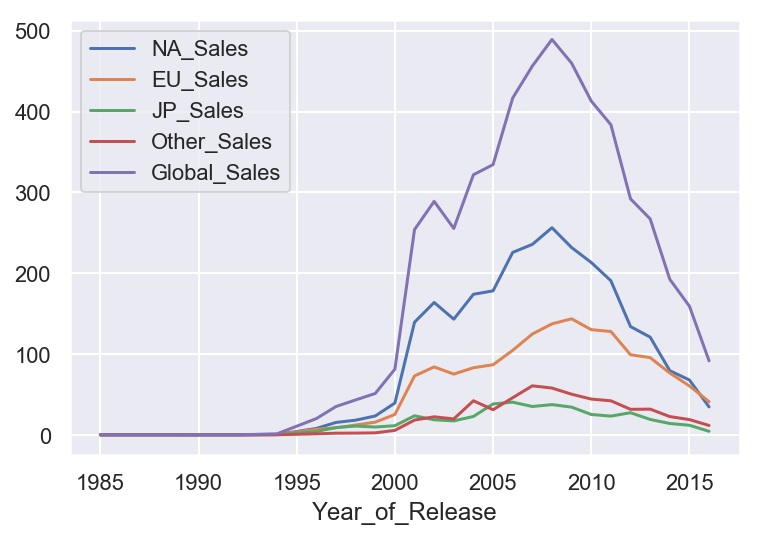

In [8]:
df[[x for x in df.columns if 'Sales' in x] + 
   ['Year_of_Release']].groupby('Year_of_Release').sum().plot();

Note that the implementation of the `plot()` method in `pandas` is based on `matplotlib`.

Using the `kind` parameter, you can change the type of the plot to, for example, a *bar chart*. `matplotlib` is generally quite flexible for customizing plots. You can change almost everything in the chart, but you may need to dig into the [documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html) to find the corresponding parameters. For example, the parameter `rot` is responsible for the rotation angle of ticks on the x-axis (for vertical plots):

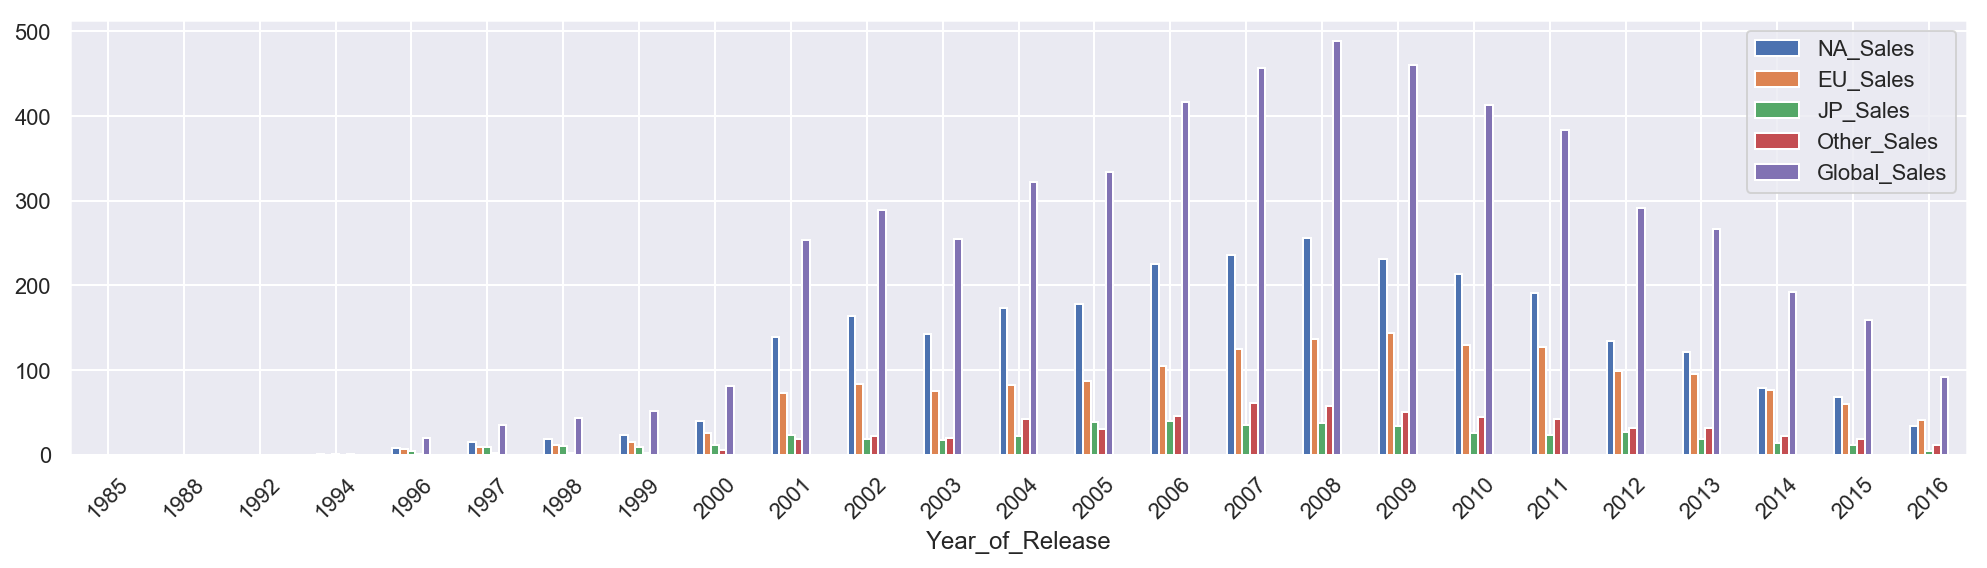

In [11]:
df[[x for x in df.columns if 'Sales' in x] + 
   ['Year_of_Release']].groupby('Year_of_Release').sum().plot(kind='bar', rot=45, figsize=(17, 4));